<a href="https://colab.research.google.com/github/Omar-Works/ID-2024/blob/main/test06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
import os
import shutil
import random

# Define paths
train_dir = '/content/drive/MyDrive/Malaria/train'
val_dir = '/content/drive/MyDrive/Malaria/val'
test_dir = '/content/drive/MyDrive/Malaria/test'

# Define the categories (subdirectories inside train and val)
categories = ['Infected', 'Uninfected']

# Set the proportion of data to move to validation (e.g., 20% for validation)
validation_split = 0.2

# Loop through each category
for category in categories:
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    # Create validation category folder if it doesn't exist
    if not os.path.exists(val_category_dir):
        os.makedirs(val_category_dir)

    # Get all files in the category folder
    files = os.listdir(train_category_dir)

    # Shuffle the files to ensure randomness
    random.shuffle(files)

    # Calculate how many files to move (based on validation split)
    num_val_files = int(len(files) * validation_split)

    # Move the files to the validation directory
    for file in files[:num_val_files]:
        shutil.move(os.path.join(train_category_dir, file), os.path.join(val_category_dir, file))

print("Data split completed!")


Data split completed!


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling images
val_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling images for validation

# Training dataset
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malaria/train',  # Path to your training data
    target_size=(224, 224),  # VGG16 expects 224x224 input size
    batch_size=32,
    class_mode='binary'  # Binary classification: malaria vs non-malaria
)

# Validation dataset
val_data = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malaria/val',  # Path to your validation data
    target_size=(224, 224),  # VGG16 expects 224x224 input size
    batch_size=32,
    class_mode='binary'  # Binary classification
)


Found 267 images belonging to 2 classes.
Found 149 images belonging to 2 classes.


In [10]:
# Load VGG16 pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of VGG16 (so their weights are not updated)
base_model.trainable = False

# Add custom layers on top
model = models.Sequential([
    base_model,  # Add VGG16 base model (without top layers)
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce spatial dimensions
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])


In [11]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Set a learning rate (optional)
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,  # You can adjust the number of epochs as needed
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 127s 8s/step - accuracy: 0.5133 - loss: 0.6963 - val_accuracy: 0.5312 - val_loss: 0.6889
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.5625 - loss: 0.6860

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.5625 - loss: 0.6860 - val_accuracy: 0.5238 - val_loss: 0.6795
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 218ms/step - accuracy: 0.5146 - loss: 0.6900 - val_accuracy: 0.5781 - val_loss: 0.6860
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7500 - loss: 0.6755 - val_accuracy: 0.7619 - val_loss: 0.6676
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.5579 - loss: 0.6842 - val_accuracy: 0.6484 - val_loss: 0.6802
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6875 - loss: 0.6749 - val_accuracy: 0.6190 - val_loss: 0.6755
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.5555 - loss: 0.6809 - val_accuracy: 0.5859 - val_loss: 0.6756
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6875 - loss: 0.6663 - val_accuracy: 0.5714 - val_loss: 0.6792
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.5427 - loss: 0.6799 - val_accuracy: 0.5312 - val_loss: 0.6734
Epoch 1

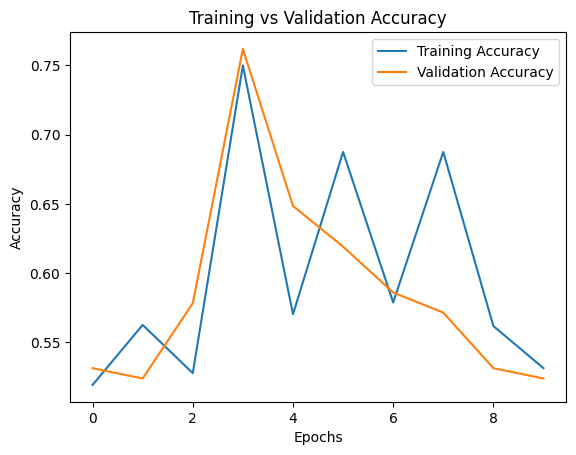

In [12]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.5235 - loss: 0.6751
Validation Loss: 0.6731002926826477
Validation Accuracy: 0.5302013158798218


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,912,069 (56.89 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 131,588 (514.02 KB)

In [15]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Set the path to your test data
test_dir = '/content/drive/MyDrive/Malaria/test'

# Create ImageDataGenerator instance for the test data (no augmentation needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,           # You can change batch size depending on memory
    class_mode='binary',     # Use 'binary' since you have 2 classes (Infected/Uninfected)
    shuffle=False            # Don't shuffle for evaluation (so predictions match filenames)
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# If you want to predict individual images, you can loop through the test set
# Example for predicting a batch of images
predictions = model.predict(test_generator)

# Display predictions for the first batch of images
for i, prediction in enumerate(predictions):
    print(f"Image {i+1} prediction: {'Infected' if prediction[0] > 0.5 else 'Uninfected'} (Confidence: {prediction[0]:.2f})")


Found 134 images belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.8362 - loss: 0.6289
Test accuracy: 67.91%
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step
Image 1 prediction: Uninfected (Confidence: 0.46)
Image 2 prediction: Uninfected (Confidence: 0.48)
Image 3 prediction: Uninfected (Confidence: 0.44)
Image 4 prediction: Uninfected (Confidence: 0.44)
Image 5 prediction: Uninfected (Confidence: 0.45)
Image 6 prediction: Uninfected (Confidence: 0.46)
Image 7 prediction: Uninfected (Confidence: 0.45)
Image 8 prediction: Uninfected (Confidence: 0.45)
Image 9 prediction: Uninfected (Confidence: 0.45)
Image 10 prediction: Uninfected (Confidence: 0.47)
Image 11 prediction: Uninfected (Confidence: 0.45)
Image 12 prediction: Uninfected (Confidence: 0.43)
Image 13 prediction: Uninfected (Confidence: 0.47)
Image 14 prediction: Uninfected (Confidence: 0.46)
Image 15 prediction: Uninfected (Confidence: 0.43)
Image 16 prediction: Uninfected (Confidence: 0.47)
Image 17 prediction: